Vy = 0:
t >  |   vx(m/s) >      |    xx (m)>       |    xy (m)>
0.488 23.388892107011767 12.333167910729786 1.1718980294792691

Xy = 0:
t >  |   vx(m/s) >      |    xx (m)>       |    xy (m)>
0.978 20.416305971113356 23.033945726727207 0.000368901020502326



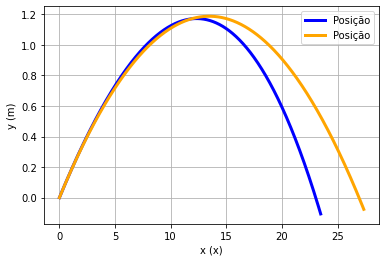

In [22]:

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Gravidade
g = 9.8

# Tempo inicial e final
ti = 0
tf = 1

# Velocidade terminal (paraquedas fechado)
vtx = 100 * 1000 / 3600
vty = 100 * 1000 / 3600

# Velocidade inicial
v0 = 100 * 1000 / 3600
alpha = 10

xx0 = 0
xy0 = 0
vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))


# Aceleração
Dx = g / (vtx * np.abs(vtx))
Dy = g / (vty * np.abs(vty))


# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)
xy = np.empty(n + 1)
vy = np.empty(n + 1)
ay = np.empty(n + 1)

# Introduzir v0 no vetor velocidade
xx[0] = xx0
vx[0] = vx0
xy[0] = xy0
vy[0] = vy0

# Preencher o vetor v
for i in range(n):
    # v0 aqui é a velocidade inicial desde o ultimo ponto
    #   v    =  v0  + a * t
    ax[i] = - Dx * vx[i] * np.abs(vx[i])
    xx[i + 1] = xx[i] + vx[i] * dt
    vx[i + 1] = vx[i] + ax[i] * dt
    
    ay[i] = - Dy * vy[i] * np.abs(vy[i]) - g
    xy[i + 1] = xy[i] + vy[i] * dt
    vy[i + 1] = vy[i] + ay[i] * dt
    
    
xanal = xx0 + vx0 * t
yanal = xy0 + vy0 * t + 0.5 * -g * t ** 2


# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (vy[i] > (0 - dt) and vy[i + 1] < (0 + dt)):
        print("Vy = 0:")
        print("t >  |   vx(m/s) >      |    xx (m)>       |    xy (m)>")
        print(t[i + 1], vx[i + 1], xx[i + 1], xy[i + 1])
        print("")
        break

# Encontrar os dados do paraquedista quando ele chega ao solo (x = 0)
for i in range(n):
    if (xy[i] > (0 - dt) and xy[i + 1] < (0 + dt)):
        print("Xy = 0:")
        print("t >  |   vx(m/s) >      |    xx (m)>       |    xy (m)>")
        print(t[i + 1], vx[i + 1], xx[i + 1], xy[i + 1])
        print("")
        break

    

    
# Plot
plt.plot(xx, xy, label="Posição",  linestyle='-', linewidth=3, color="blue")
plt.plot(xanal, yanal, label="Posição",  linestyle='-', linewidth=3, color="orange")
plt.ylabel("y (m)")
plt.xlabel("x (x)")
plt.legend()         # Legenda só aparece com isto
plt.grid()